<h1 align="center"> Assignment 1 </h1>

In [1]:
using DataFrames
using Plots; pythonplot()

┌ Warning: KeyError("DISPLAY")
└ @ PythonPlot /home/vortriz/.julia/packages/PythonPlot/469aA/src/init.jl:127


Plots.PythonPlotBackend()

### 1. & 2. Declaring `add_mac` and `mul_mac` with counters

In [2]:
function add_mac(a, b)
    c = a + b
    global count_add += 1

    return (c % base, c ÷ base)
end

add_mac (generic function with 1 method)

In [3]:
function mul_mac(a, b)
	c = a * b
    global count_mul += 1

	return (c % base, c ÷ base)
end

mul_mac (generic function with 1 method)

In [4]:
function add1(a, b, c)
	r₁, c₁ = add_mac(a[1], b[1])
	r₂, c₂ = add_mac(r₁, c)
	r₃, c₃ = add_mac(c₁, c₂)

	if length(b) == 1
		return r₂, r₃
	end

	return append!([r₂], add1(a[2:end], b[2:end], r₃))
end

add1 (generic function with 1 method)

In [5]:
function add(a, b)
    global count_add = 0

	l = abs(length(a) - length(b)) # padding length
	a, b = length(a) < length(b) ? (vcat(a, zeros(Int, l)), b) : (a, vcat(b, zeros(Int, l))) # padded number vectors

	return add1(a, b, 0)
end

add (generic function with 1 method)

In [6]:
function mul1(a, b, c)
	r₁, c₁ = mul_mac(a, b[1])
	r₂, c₂ = add_mac(r₁, c)
	r₃, c₃ = add_mac(c₁, c₂)

	if length(b) == 1
		return r₂, r₃
	end

	return append!([r₂], mul1(a, b[2:end], r₃))
end

mul1 (generic function with 1 method)

In [7]:
function mul(a, b)
	r = mul1(a[1], b, 0)

	if length(a) == 1
		return r
	end

	s = [0; mul(a[2:end], b)]

	return add(r, s)
end

mul (generic function with 1 method)

In [8]:
function multiply(a, b)
    global count_add = 0
    global count_mul = 0

    return mul(a, b)
end

multiply (generic function with 1 method)

### Sample of working

In [9]:
base = 10

10

In [10]:
α, β = 12, 123
a, b = digits(BigInt, α), digits(BigInt, β)

(BigInt[2, 1], BigInt[3, 2, 1])

In [11]:
add(a, b)

4-element Vector{BigInt}:
 5
 3
 1
 0

In [12]:
@show count_add

count_add = 9


9

In [13]:
multiply(a, b)

6-element Vector{BigInt}:
 6
 7
 4
 1
 0
 0

In [14]:
@show count_add, count_mul

(count_add, count_mul) = (15, 6)


(15, 6)

### 3. & 5. Calculate number of `add_mac` and `mul_mac` calls as well as the execution time, for input size ranging from $1$ digit to $40$ digits.

In [20]:
lengths = 1:40
times = 100 # number of times to run the function to average out over
df_addition = DataFrame(length = Int[], count_add = Int[], time = Float64[])
df_multiplication = DataFrame(length = Int[], count_add = Int[], count_mul = Int[], time = Float64[])

for l in lengths
    n = digits(BigInt, parse(BigInt, "$(base-1)"^l))

    total_time_add = 0.0
    total_time_mul = 0.0

    for _ in 1:times
        time_add = @timed add(n, n)
        total_time_add += time_add.time

        sleep(0.01)

        time_mul = @timed multiply(n, n)
        total_time_mul += time_mul.time

        sleep(0.01)

    end

    avg_time_add = total_time_add / times
    avg_time_mul = total_time_mul / times

    push!(df_addition, (l, count_add, avg_time_add))
    push!(df_multiplication, (l, count_add, count_mul, avg_time_mul))

end

### 4. & 6. Plot and compare function calls and execution time

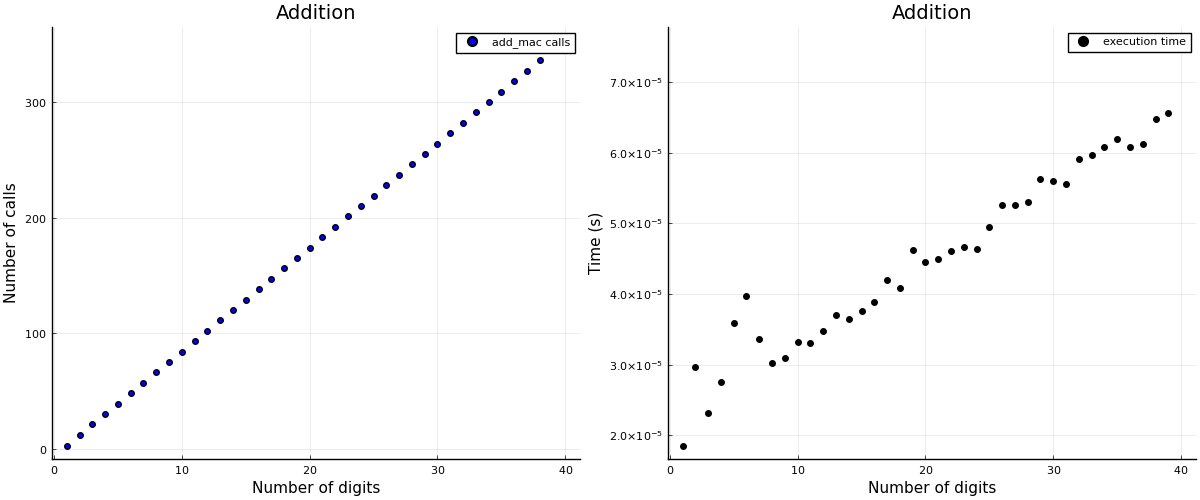

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [21]:
scatter(df_addition.length, [df_addition.count_add df_addition.time],
    layout = (1, 2), size=(1200, 500),
    markershape=:circle, seriescolor=[:blue :black],
    labels=["add_mac calls" "execution time"], xlabel="Number of digits", ylabel=["Number of calls" "Time (s)"],
    title="Addition")

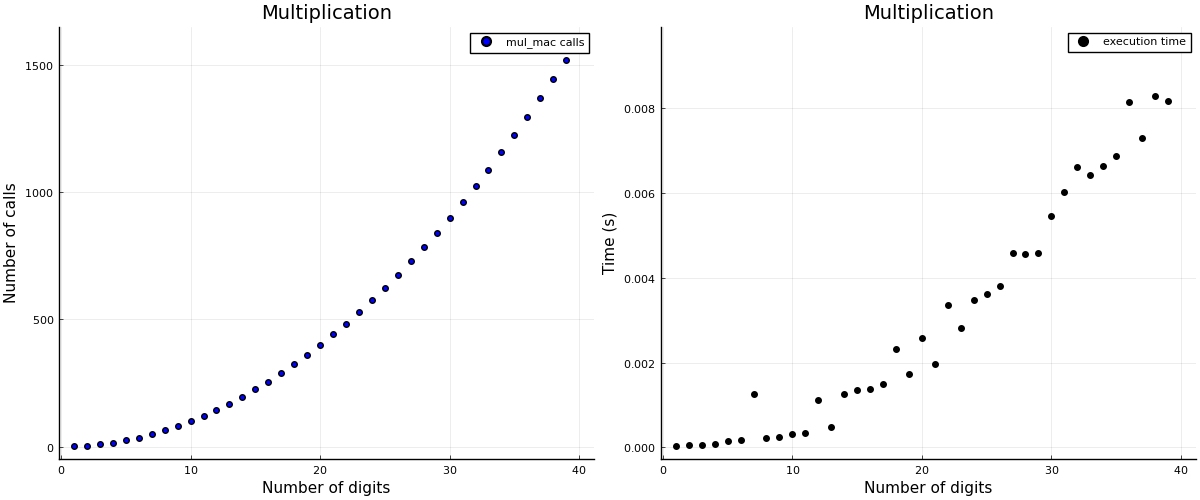

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [22]:
scatter(df_multiplication.length, [df_multiplication.count_mul df_multiplication.time],
    layout = (1, 2), size=(1200, 500),
    markershape=:circle, seriescolor=[:blue :black],
    label=["mul_mac calls" "execution time"], xlabel="Number of digits", ylabel=["Number of calls" "Time (s)"],
    title="Multiplication")